In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

In [3]:
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost+= R[n,k] * d(M[k], X[n])
    return cost

In [4]:
def plot_k_means(X, K, max_iter=25, beta=1):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    
    for i in range(K):
        M[i] = X[np.random.choice(N)]
        
    grid_width = 5
    grid_height = max_iter/grid_width
    random_colors=np.random.random((K,3))
    plt.figure()
        
    costs = np.zeros(max_iter)
    
    for i in range(max_iter):
            colors=R.dot(random_colors)
            plt.subplot(grid_width, grid_height, i+1)
            plt.scatter(X[:,0], X[:, 1], c = colors)
            
            for k in range(K):
                for n in range(N):
                    R[n, k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))
            for k in range(K):
                M[k] = R[:, k].dot(X)/R[:,k].sum()
            costs[i] = cost(X, R, M)
            if i > 0:
                if np.abs(costs[i] - costs[i-1]) < 0.1:
                    break
    plt.plot(costs)
    plt.title("Costs")
    plt.show()
    
    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.show()    

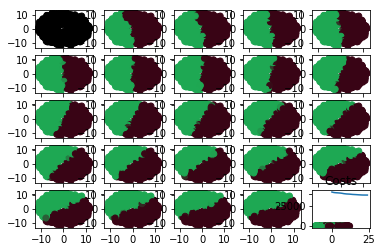

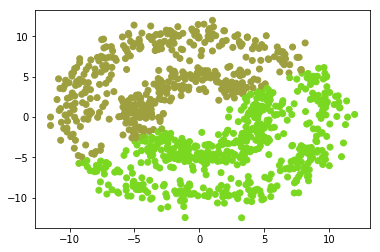

In [7]:
N = 1000
D = 2
innerRadius = 5
outerRadius = 10

R1 = np.random.randn(int(N/2)) + innerRadius
theta = 2*np.pi*np.random.random(int(N/2))
innerX = np.concatenate([[R1*np.cos(theta)], [R1*np.sin(theta)]]).T

R2 = np.random.randn(int(N/2)) + outerRadius
theta = 2*np.pi*np.random.random(int(N/2))
outerX = np.concatenate([[R2*np.cos(theta)], [R2*np.sin(theta)]]).T

X = np.concatenate([innerX, outerX])
plot_k_means(X, 2)

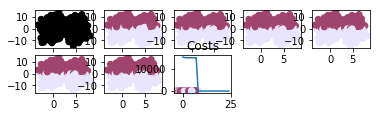

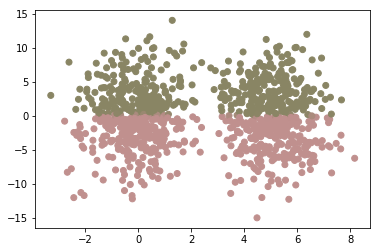

In [5]:
X = np.zeros((1000, 2))
X[:500, :] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
X[500:, :] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
plot_k_means(X, 2)

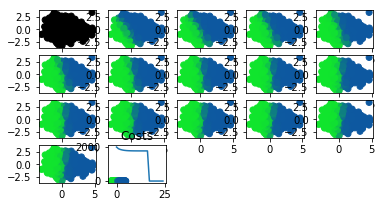

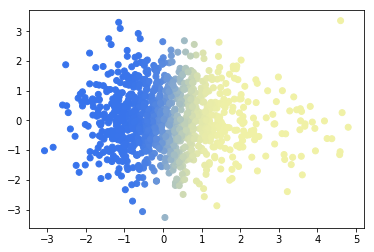

In [6]:
X = np.zeros((1000, 2))
X[:950, :] = np.array([0, 0]) + np.random.randn(950, 2)
X[950:, :] = np.array([3, 0]) + np.random.randn(50, 2)
plot_k_means(X, 2)